In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [43]:
df = pd.read_csv('./clean.csv')

In [44]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,amazfit,ambrane,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.025761,0.072534,0.750000,0.276596,1.000000,0.538462,0.409091,-2000.000000,False,True,...,False,False,False,False,False,False,True,False,False,False
1,0.515049,0.756029,0.500000,0.017529,1.000000,0.461538,0.409091,-8800.000001,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.120218,0.155172,0.750000,0.108115,1.000000,0.615385,1.000000,-2000.000000,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.090164,0.155172,0.583333,0.003423,0.552941,0.230769,1.000000,-2700.000000,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.012881,0.080047,0.583333,0.229402,1.000000,0.230769,0.409091,-2500.000000,False,False,...,False,False,False,False,False,False,True,False,False,False


In [45]:
X= df.drop('Discount Price',axis=1)
y = df['Discount Price']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_predict_lr = lr_model.predict(X_test)
result = r2_score(y_test,y_predict_lr)
print(f"The results is : {result}")

The results is : 0.6777798834122404


## Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [50]:
y_predict_dt = dt_model.predict(X_test)
result_dt = r2_score(y_test,y_predict_dt)
print(f"The results is : {result_dt}")

The results is : 0.5094010650542


## Random Forest Algorithm

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_predict_rf = rf_model.predict(X_test)
result_rf = r2_score(y_test,y_predict_rf)
# print(result_rf)
print(f"The percentage of accuracy is {round(result_rf *100)} %")

The percentage of accuracy is 49 %


## XGBoost 


In [53]:
import  xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [54]:
y_predict = model.predict(X_test)
result = r2_score(y_test,y_predict)
print(f"The percentage of accuracy is {round(result *100)} %")

The percentage of accuracy is 46 %


## Cross Validation Score

In [55]:
from sklearn.model_selection import cross_val_score

Decision Tree algorithm

In [56]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_predict_dt = dt_model.predict(X_test)
result_dt = r2_score(y_test,y_predict_dt)
print(f"The results is : {result_dt}")

The results is : 0.39376900400463166


In [57]:
score = cross_val_score(dt_model,X,y,cv = 5,scoring = 'r2')
print('cross_val_score: ',score,score.mean(),score.std())

cross_val_score:  [0.62683225 0.51003053 0.43603097 0.46671283 0.70993968] 0.5499092533331293 0.1029632028664461


Random Forest algorithm

In [58]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_predict_rf = rf_model.predict(X_test)
result_rf = r2_score(y_test,y_predict_rf)
# print(result_rf)
print(f"The percentage of accuracy is {round(result_rf *100)} %")

The percentage of accuracy is 48 %


In [59]:
score = cross_val_score(rf_model,X,y,cv = 5,scoring = 'r2')
print('cross_val_score: ',score,score.mean(),score.std())

cross_val_score:  [0.7690038  0.59738329 0.79211177 0.67305978 0.56278068] 0.6788678668985701 0.09066242084937895


XGBoost

In [60]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
result = r2_score(y_test,y_predict)
print(f"The percentage of accuracy is {round(result *100)} %")

The percentage of accuracy is 46 %


In [61]:
score = cross_val_score(model,X,y,cv = 5,scoring = 'r2')
print('cross_val_score: ',score,score.mean(),score.std())

cross_val_score:  [0.73696964 0.69409824 0.7762884  0.66906144 0.70642802] 0.7165691487120484 0.03700631343109767


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_gird = {
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5],
    'learning_rate': [0.01,0.1,0.2]
}

grid_search = GridSearchCV(estimator = model, param_grid= param_gird,cv =5 , scoring = 'r2')

In [64]:
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.5694805723845822


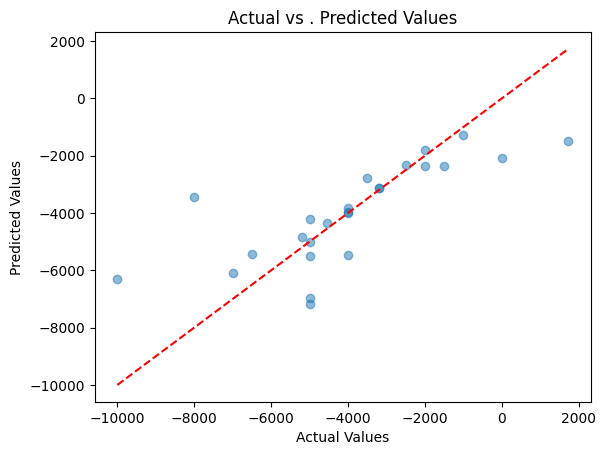

In [65]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs . Predicted Values')
plt.show()

In [66]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(best_model,f)

In [67]:
with open('model.pkl','rb') as f:
    xgb_model = pickle.load(f)

In [69]:
 y_pred = xgb_model.predict(X_test)
res = r2_score(y_test,y_pred)
print(f"The percentage of accuracy is {round(res *100)} %")

The percentage of accuracy is 57 %
